In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import files
import xarray


In [2]:
uploaded = files.upload()

Saving Dataset_K_means.csv to Dataset_K_means.csv


In [22]:
data = pd.read_csv('Dataset_K_means.csv',sep=';')
data = data.drop(columns=["seed", "range"])

In [ ]:
data.head()

,x,y
0,6.948397,3.409377
1,4.813237,4.017016
2,4.952827,6.237223
3,4.601479,6.335274
4,6.491144,6.409167


1


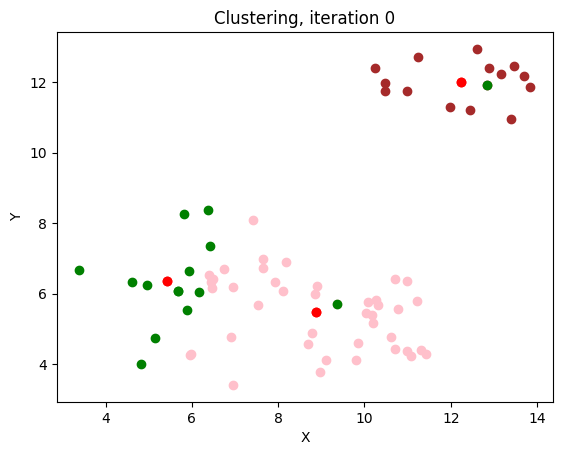

1


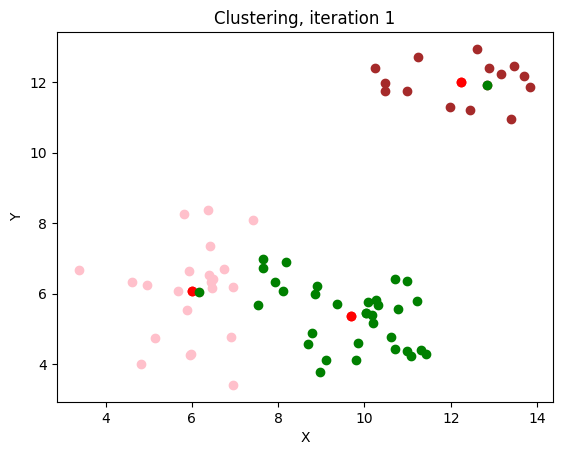

1


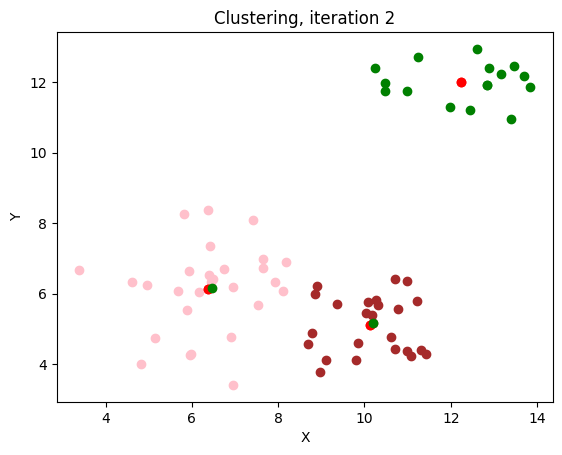

1


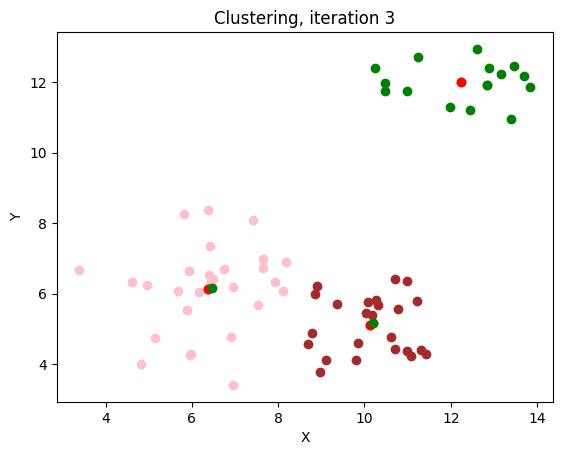

1


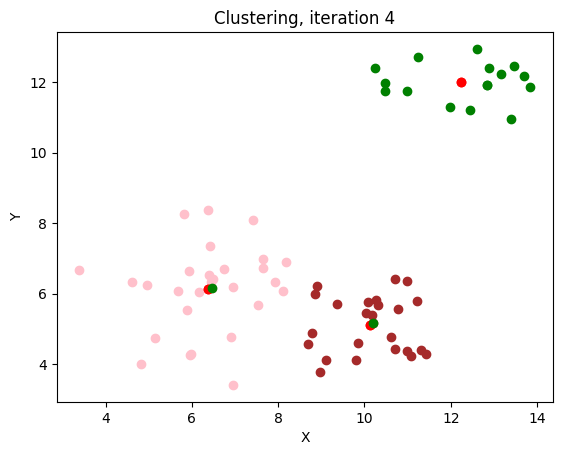

1


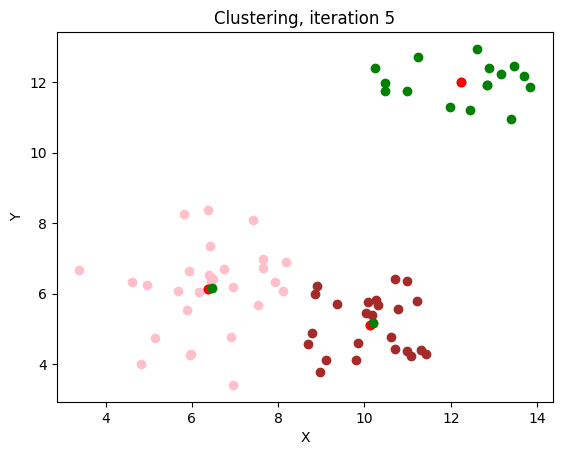

1


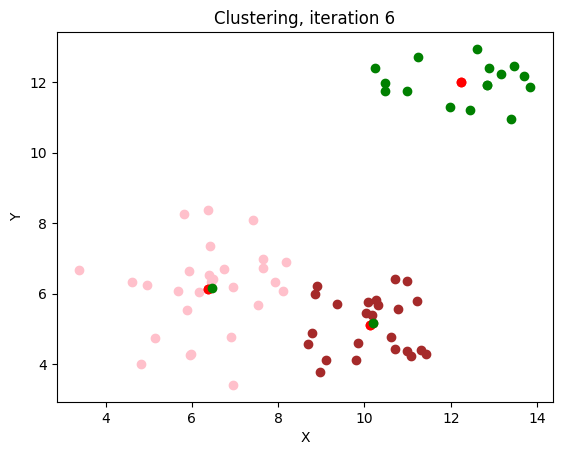

1


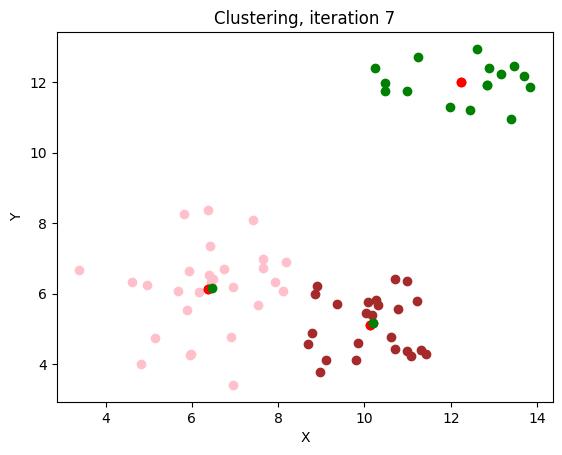

1


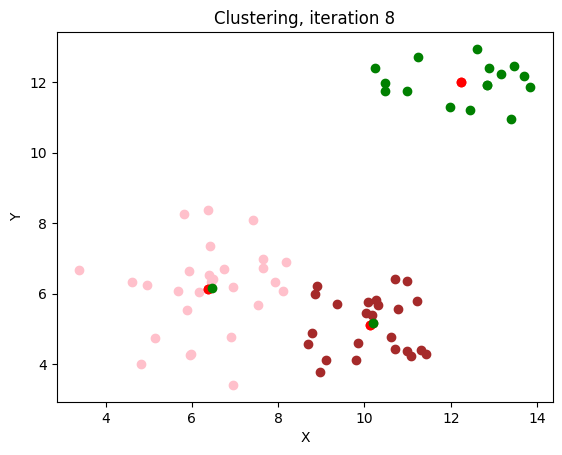

1


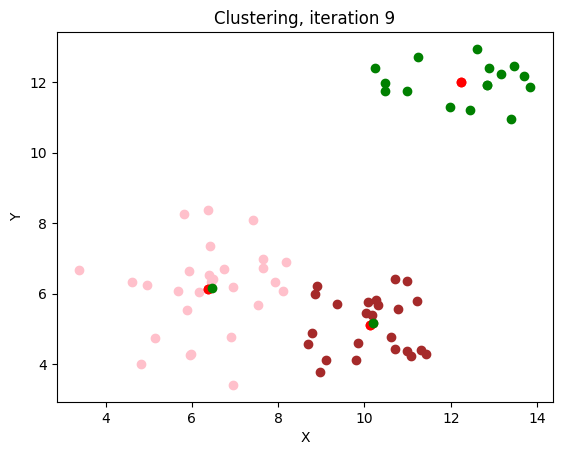

1


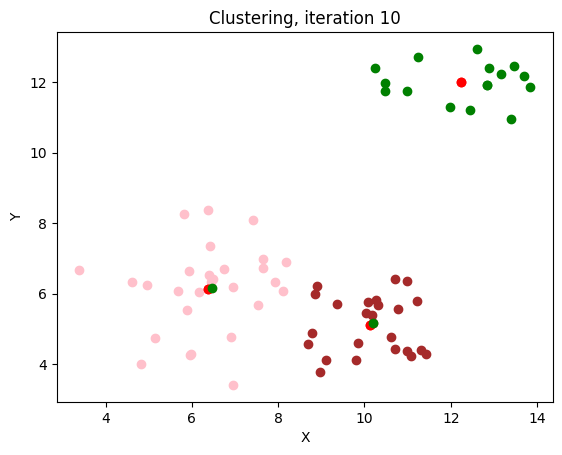

1


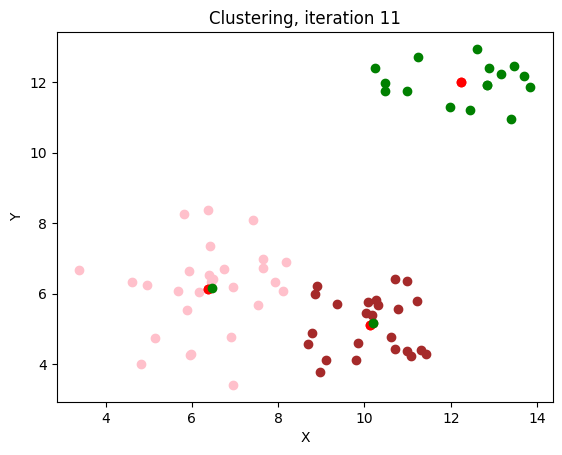

1


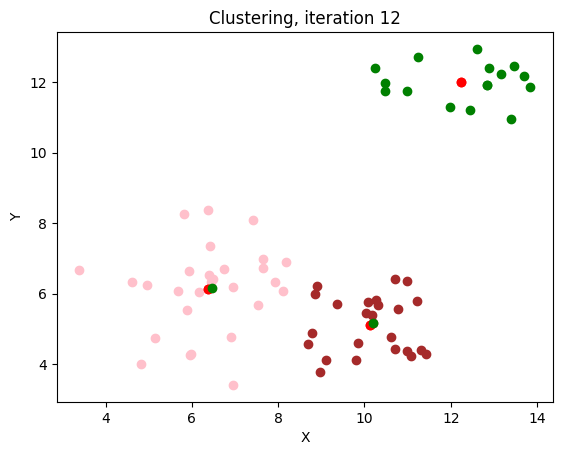

1


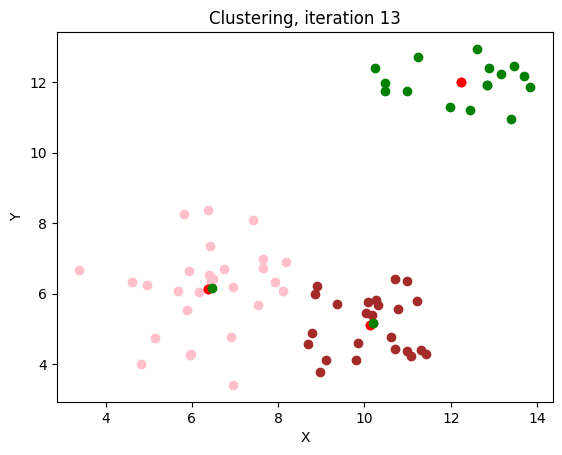

1


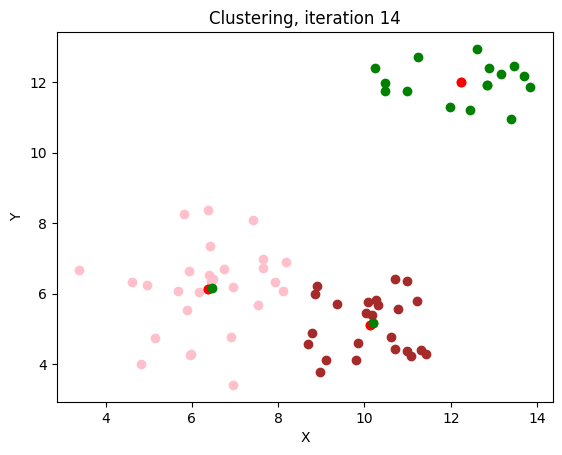

In [23]:
# Step 1. Randomly choose K points from the dataset
K = 3
iterating_number = 15
centroids = data.sample(n=K)
centroids.to_xarray()
data = data.to_xarray()

# Step 2. For each of the dataset elements, calculate the distance from each centroid and assign the lowest to the each element.

distance = [0]*K
data['cluster_dist'] = (data.dims, np.nan * np.ones(data['x'].shape))
data['cluster_ind'] = (data.dims, np.nan * np.ones(data['x'].shape))

def distanceToCentroid(df, centroids):
    for i in range(len(df['x'])):
      for j in range(K):
        distance[j] = np.sqrt((df['x'].isel(index=i).values - centroids['x'].values[j])**2 + (df['y'].isel(index=i).values - centroids['y'].values[j])**2)
      min_index = distance.index(min(distance))
      distance.sort()
      df['cluster_dist'].loc[dict(index=i)] = distance[0]
      df['cluster_ind'].loc[dict(index=i)] = centroids.index[min_index]

    return df


for iteration in range(iterating_number):
  print(1)

  data = distanceToCentroid(data, centroids)
  data_df = data.to_pandas()

  # Step 3. Calculate the center of mass of each group

  mean_centroids = []

  for i in data_df['cluster_ind'].unique():
    mean_centroids.append(data_df.groupby('cluster_ind').get_group(i).mean())

  # Drawing the datapoints with the new centroids highlighted

  plt.xlabel("X")
  plt.ylabel("Y")
  plt.title("Clustering, iteration " + str(iteration))
  scatter = [0]*K
  colors = ['pink', 'green', 'brown','blue','yellow','orange']

  for i in range(K):
    for j in range(data_df['cluster_ind'].value_counts().get(data_df['cluster_ind'].unique()[i], 0)):
        dx = data_df[data_df['cluster_ind']==data_df['cluster_ind'].unique()[i]].values[j][0]
        dy = data_df[data_df['cluster_ind']==data_df['cluster_ind'].unique()[i]].values[j][1]
        scatter[i]=plt.scatter(dx,dy,c=colors[i])

  for i in range(len(mean_centroids)):
    scatter2=plt.scatter(mean_centroids[i].values[0],mean_centroids[i].values[1],c='red')


  # STEP 4. Find the closest points to current centroids (means) and make them the  new centroids

  data_df = distanceToCentroid(data, pd.DataFrame(mean_centroids))
  data_df = data_df.to_pandas()

  distance = [0]*K
  data['cluster_dist'] = (data.dims, np.nan * np.ones(data['x'].shape))
  data['cluster_ind'] = (data.dims, np.nan * np.ones(data['x'].shape))

  for i in range(K):
    centroids['x'].values[i]=data_df[data_df['cluster_ind']==data_df['cluster_ind'].unique()[i]].sort_values(by=['cluster_dist']).values[0][0]
    centroids['y'].values[i]=data_df[data_df['cluster_ind']==data_df['cluster_ind'].unique()[i]].sort_values(by=['cluster_dist']).values[0][1]

  for i in range(len(mean_centroids)):
    scatter2=plt.scatter(mean_centroids[i].values[0],mean_centroids[i].values[1],c='red')

  for i in range(K):
    scatter3=plt.scatter(centroids['x'].values[i],centroids['y'].values[i],c='green')

  plt.show()
